In [1]:
#Group project!



We've been hired by a new fizzy seltzer brand called Brian's Booze. The company has hired us as Data Scientists to determine which countries have the highest alcohol consumption so that their marketing team can target those countries to build/sell their brand in. It is our job to use different lifestyle variables that will help predict which countries have the highest alcohol consumption per capita. 

We will cluster alcohol consumption into low, medium, and high categories. 

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
#let import all out data
#Alcohol Data
alc_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/alcohol.csv")
df_alc = pd.melt(alc_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='Alcohol Consumption')
columns_to_drop = ['Series Name', 'Series Code', 'Country Code']
df_alc = df_alc.drop(columns=columns_to_drop)
df_alc.head()

,Country Name,Year,Alcohol Consumption
0,Afghanistan,2015 [YR2015],0.00874
1,Africa Eastern and Southern,2015 [YR2015],4.75979799686623
2,Africa Western and Central,2015 [YR2015],4.4374260825495
3,Albania,2015 [YR2015],5.03752
4,Algeria,2015 [YR2015],0.5844


In [3]:
#Literacy Rate Data
lit_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/Literacy_rate_data.csv")
df_lit = pd.melt(lit_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='Literacy_rate')
columns_to_drop = ['Series Name', 'Series Code', 'Country Code']
df_lit = df_lit.drop(columns=columns_to_drop)
df_lit.head()

,Country Name,Year,Literacy_rate
0,Afghanistan,2015 [YR2015],..
1,Albania,2015 [YR2015],..
2,Algeria,2015 [YR2015],..
3,American Samoa,2015 [YR2015],..
4,Andorra,2015 [YR2015],..


## need to load in population data

In [5]:
#Population Data
pop_df = pd.read_csv("/Users/alexandratorti/DS-3001/DS-3001/Final_Project/pop_data.csv")
df_pop = pd.melt(pop_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='population_density')
columns_to_drop = ['Series Name', 'Series Code', 'Country Code']
df_pop = df_pop.drop(columns=columns_to_drop)
df_pop.head()

,Country Name,Year,population_density
0,Afghanistan,2013 [YR2013],48.3590282569032
1,Albania,2013 [YR2013],105.660291970803
2,Algeria,2013 [YR2013],15.9549850109584
3,American Samoa,2013 [YR2013],264.975
4,Andorra,2013 [YR2013],151.844680851064


In [5]:
#Birth Rate Data
birth_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/birthratedata.csv")
df_birth = pd.melt(birth_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='birth_rate')
df_birth = df_birth.drop(columns=columns_to_drop)
df_birth.head()

,Country Name,Year,birth_rate
0,Afghanistan,2015 [YR2015],38.803
1,Albania,2015 [YR2015],11.718
2,Algeria,2015 [YR2015],25.405
3,American Samoa,2015 [YR2015],..
4,Andorra,2015 [YR2015],..


In [6]:
#Unemployment Rate Data
unem_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/unemploymentdata.csv")
df_unem = pd.melt(unem_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='unemployment_rate')
df_unem = df_unem.drop(columns=columns_to_drop)
df_unem.head()

,Country Name,Year,unemployment_rate
0,Afghanistan,2015 [YR2015],..
1,Albania,2015 [YR2015],17.19
2,Algeria,2015 [YR2015],11.21
3,American Samoa,2015 [YR2015],..
4,Andorra,2015 [YR2015],..


In [7]:
#GDP Data
gdp_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/gdpdata.csv")
df_gdp = pd.melt(gdp_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='GDP')
df_gdp = df_gdp.drop(columns=columns_to_drop)
df_gdp.head()

,Country Name,Year,GDP
0,Afghanistan,2015 [YR2015],592.476164793256
1,Albania,2015 [YR2015],3952.80358410846
2,Algeria,2015 [YR2015],4197.41997101868
3,American Samoa,2015 [YR2015],13101.5418159165
4,Andorra,2015 [YR2015],38885.5303237179


In [8]:
#Death Rate Data
death_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/deathdata.csv")
df_death = pd.melt(death_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='Death_rate')
df_death = df_death.drop(columns=columns_to_drop)
df_death.head()

,Country Name,Year,Death_rate
0,Afghanistan,2015 [YR2015],7.331
1,Albania,2015 [YR2015],7.947
2,Algeria,2015 [YR2015],4.437
3,American Samoa,2015 [YR2015],..
4,Andorra,2015 [YR2015],..


In [9]:
#Labor Force Participation Data
labor_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/laborparticipation.csv")
df_labor = pd.melt(labor_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='LF_rate')
df_labor = df_labor.drop(columns=columns_to_drop)
df_labor.head()

,Country Name,Year,LF_rate
0,Afghanistan,2015 [YR2015],..
1,Albania,2015 [YR2015],31.3
2,Algeria,2015 [YR2015],25.19
3,American Samoa,2015 [YR2015],..
4,Andorra,2015 [YR2015],..


In [10]:
#now its time to merge all out dataframes. 
# Merge DataFrames
merged_df = pd.merge(df_lit, df_birth, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_unem, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_gdp, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_death, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_labor, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_alc, on=['Country Name', 'Year'])
# merged_df = pd.merge(merged_df, df_pop, on=['Country Name', 'Year'])
merged_df.head()

,Country Name,Year,Literacy_rate,birth_rate,unemployment_rate,GDP,Death_rate,LF_rate,Alcohol Consumption
0,Afghanistan,2015 [YR2015],..,38.803,..,592.476164793256,7.331,..,0.00874
1,Albania,2015 [YR2015],..,11.718,17.19,3952.80358410846,7.947,31.3,5.03752
2,Algeria,2015 [YR2015],..,25.405,11.21,4197.41997101868,4.437,25.19,0.5844
3,American Samoa,2015 [YR2015],..,..,..,13101.5418159165,..,..,..
4,Andorra,2015 [YR2015],..,..,..,38885.5303237179,..,..,10.76055


## Drop variables that will not be needed or are duplicates

In [11]:
#lets take a look at our data and see what needs cleaning!
merged_df.head()

na_counts = merged_df.isna().sum()
print(na_counts)
# Check for NaN values in each row
rows_with_na = merged_df.isna().any(axis=1)

# Display rows with NaN values
print("Rows with NaN values:")
print(merged_df[rows_with_na])# there seems to be some errors when I merged the data frames that added a bunch of NaN values. Lets delete these extra rows because we will not need them

Country Name           0
Year                   0
Literacy_rate          0
birth_rate             0
unemployment_rate      0
GDP                    0
Death_rate             0
LF_rate                0
Alcohol Consumption    0
dtype: int64
Rows with NaN values:
Empty DataFrame
Columns: [Country Name, Year, Literacy_rate, birth_rate, unemployment_rate, GDP, Death_rate, LF_rate, Alcohol Consumption]
Index: []


In [12]:

# Drop rows with NaN values in column Country
df_cleaned = merged_df.dropna(subset=['Country Name'], how='any')

#DataFrame after dropping rows with NaN values in column Country Name
# print(df_cleaned)

na_counts = df_cleaned.isna().sum()
print(na_counts)


Country Name           0
Year                   0
Literacy_rate          0
birth_rate             0
unemployment_rate      0
GDP                    0
Death_rate             0
LF_rate                0
Alcohol Consumption    0
dtype: int64


In [14]:
#Need to drop .. values so that we can transform values to floats
df_cleaned.replace('..', np.nan, inplace=True)
df_cleaned.info()


#We need to change the columns that are objects to strings and floats
columns_to_convert = ['Literacy_rate', 'birth_rate', "unemployment_rate", "GDP", "Death_rate", "LF_rate", "Alcohol Consumption"]
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].astype(float)


columns_to_convert2 = ['Country Name', 'Year']
df_cleaned[columns_to_convert2] = df_cleaned[columns_to_convert2].astype(str)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country Name         432 non-null    object
 1   Year                 432 non-null    object
 2   Literacy_rate        65 non-null     object
 3   birth_rate           427 non-null    object
 4   unemployment_rate    247 non-null    object
 5   GDP                  418 non-null    object
 6   Death_rate           427 non-null    object
 7   LF_rate              228 non-null    object
 8   Alcohol Consumption  372 non-null    object
dtypes: object(9)
memory usage: 30.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Name         432 non-null    object 
 1   Year                 432 non-null    object 
 2   Literac

In [15]:
#For the first time we cluster, lets use 2019 data.
df = pd.DataFrame(df_cleaned)

# Specify the year you want to keep
target_year = '2019 [YR2019]'

# Use boolean indexing to filter the DataFrame
df_filtered = df[df['Year'] == target_year]

# Display the result
print(df_filtered)
df_filtered.info()


              Country Name           Year  Literacy_rate  birth_rate  \
216            Afghanistan  2019 [YR2019]            NaN      36.466   
217                Albania  2019 [YR2019]            NaN      10.343   
218                Algeria  2019 [YR2019]            NaN      23.298   
219         American Samoa  2019 [YR2019]            NaN         NaN   
220                Andorra  2019 [YR2019]            NaN       7.000   
..                     ...            ...            ...         ...   
427  Virgin Islands (U.S.)  2019 [YR2019]            NaN      12.300   
428     West Bank and Gaza  2019 [YR2019]      97.378258      29.466   
429            Yemen, Rep.  2019 [YR2019]            NaN      31.778   
430                 Zambia  2019 [YR2019]            NaN      35.462   
431               Zimbabwe  2019 [YR2019]            NaN      31.518   

     unemployment_rate           GDP  Death_rate  LF_rate  Alcohol Consumption  
216                NaN    500.522981       6.791      

In [16]:
#Now lets normalize the data!
numeric_columns = df_filtered.select_dtypes("float", "int").columns
print(numeric_columns)
df_filtered[numeric_columns]= MinMaxScaler().fit_transform(df_filtered[numeric_columns])


Index(['Literacy_rate', 'birth_rate', 'unemployment_rate', 'GDP', 'Death_rate',
       'LF_rate', 'Alcohol Consumption'],
      dtype='object')


/var/folders/dg/_hgxmwbx0vn902dz__0p5_440000gn/T/ipykernel_1020/2499516412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[numeric_columns]= MinMaxScaler().fit_transform(df_filtered[numeric_columns])


In [17]:
#Lets do a final Check on NaN values. 
na_counts = df_filtered.isna().sum()
print(na_counts)
df_filtered.info()
#Why dropping all NaN values shrinks our dataset a lot, it won't harm the integrity of the data. 
#we will drop the NaN values here. 
df_2019 = df_filtered.dropna()
df_2019.info()

Country Name             0
Year                     0
Literacy_rate          190
birth_rate               2
unemployment_rate       90
GDP                      7
Death_rate               2
LF_rate                 95
Alcohol Consumption     30
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 216 to 431
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Name         216 non-null    object 
 1   Year                 216 non-null    object 
 2   Literacy_rate        26 non-null     float64
 3   birth_rate           214 non-null    float64
 4   unemployment_rate    126 non-null    float64
 5   GDP                  209 non-null    float64
 6   Death_rate           214 non-null    float64
 7   LF_rate              121 non-null    float64
 8   Alcohol Consumption  186 non-null    float64
dtypes: float64(7), object(2)
memory usage: 16.9+ KB
<class 'pandas.core.frame.DataFrame'>
In

In [19]:
#The last step is to creat bins for out terget varibale
#will will determine low, high and medium consumption based off of how each country ranks compared to others. 
# Calculate percentiles
percentiles = [0, 0.33, 0.66, 1.0]
percentile_values = df_2019['Alcohol Consumption'].quantile(percentiles)
print(percentile_values)

labels = ['Low', 'Medium', 'High']

# Create the categorical variable
df_2019["Alcohol Consumption Category"] = pd.cut(df_2019['Alcohol Consumption'], percentile_values, labels=labels)



0.00    0.006090
0.33    0.165473
0.66    0.325642
1.00    0.641630
Name: Alcohol Consumption, dtype: float64


/var/folders/dg/_hgxmwbx0vn902dz__0p5_440000gn/T/ipykernel_1020/3042536659.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["Alcohol Consumption Category"] = pd.cut(df_2019['Alcohol Consumption'], percentile_values, labels=labels)


## Run the clustering algo with your best guess for - this Alex

In [20]:
#Run the clustering algo with your best guess for K
clust_data = df_2019[['Literacy_rate', 'birth_rate', "unemployment_rate", "GDP", "Death_rate", "LF_rate"]]
kmeans_obj = KMeans(n_clusters=3, random_state=1).fit(clust_data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## View the results - This is Alex


In [21]:
#View the results
print(kmeans_obj.cluster_centers_)
print(kmeans_obj.labels_) #clusters for vector assignments
print(kmeans_obj.inertia_) #distance from centroids, smaller is better

[[0.8808044  0.33014173 0.21147799 0.05878889 0.33021803 0.45132875]
 [0.99102953 0.08021973 0.32262186 0.08179014 0.75975257 0.33631571]
 [0.92924068 0.38479441 1.         0.03249454 0.52539803 0.2200032 ]]
[1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 2 0 0 0 1]
1.7366804653853058


## Create a visualization of the results with 2 or 3 variables that you think will best differentiate the clusters- This is Alex

In [22]:
df_2019.head()

,Country Name,Year,Literacy_rate,birth_rate,unemployment_rate,GDP,Death_rate,LF_rate,Alcohol Consumption,Alcohol Consumption Category
233,Belarus,2019 [YR2019],0.998209,0.085087,0.159591,0.033243,0.813909,0.461096,0.641630,High
258,Colombia,2019 [YR2019],0.932458,0.219775,0.400157,0.031228,0.304639,0.491772,0.289336,Medium
263,Cote d'Ivoire,2019 [YR2019],0.856312,0.717085,0.090409,0.010413,0.533255,0.442882,0.165076,Low
275,El Salvador,2019 [YR2019],0.845571,0.263170,0.159984,0.020402,0.445241,0.500719,0.193122,Medium
301,Honduras,2019 [YR2019],0.836607,0.393603,0.214230,0.011560,0.229099,0.626618,0.186502,Medium


In [24]:
#lets see which  variables best correlate with our target variable
target_variable = "Alcohol Consumption"
#I am going to make a correlation matrix to test which variables are important
columns_of_interest = ['Literacy_rate', 'birth_rate', "unemployment_rate", "GDP", "Death_rate", "LF_rate"]

# Select the specified columns and the salary column
selected_data = df_2019[columns_of_interest + [target_variable]]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print(correlation_matrix)#death rate and literacy rate seem to have the highest correlation, unemployment does too


                     Literacy_rate  birth_rate  unemployment_rate       GDP  \
Literacy_rate             1.000000   -0.522829           0.175090  0.306081   
birth_rate               -0.522829    1.000000          -0.109192 -0.578427   
unemployment_rate         0.175090   -0.109192           1.000000 -0.099965   
GDP                       0.306081   -0.578427          -0.099965  1.000000   
Death_rate                0.122543   -0.241666           0.180089 -0.231302   
LF_rate                  -0.104367    0.204571          -0.356545 -0.116537   
Alcohol Consumption       0.524442   -0.294356           0.349382 -0.090005   

                     Death_rate   LF_rate  Alcohol Consumption  
Literacy_rate          0.122543 -0.104367             0.524442  
birth_rate            -0.241666  0.204571            -0.294356  
unemployment_rate      0.180089 -0.356545             0.349382  
GDP                   -0.231302 -0.116537            -0.090005  
Death_rate             1.000000 -0.433004 

In [25]:
fig = px.scatter(df_2019, x="Literacy_rate", y="Death_rate", color=kmeans_obj.labels_,
                    title="Literacy Rate vs. Death Rate")
fig.show(renderer="browser")

## Evaluate the quality of the clustering using total variance explained and silhouette scores

In [26]:
#Evaluate the quality of the clustering using total variance explained and silhouette scores
total_sum_squares = np.sum((clust_data - np.mean(clust_data))**2)
total = np.sum(total_sum_squares)
print(total)

between_SSE = (total-kmeans_obj.inertia_)
print(between_SSE)
Var_explained = between_SSE/total
print(Var_explained)#variance explained looks good!

11.258373650598635
9.52169318521333
0.8457432201770136


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



## Determine the ideal number of clusters using the elbow method and the silhouette coefficient - Hailey

In [28]:
X=df_2019[columns_of_interest]

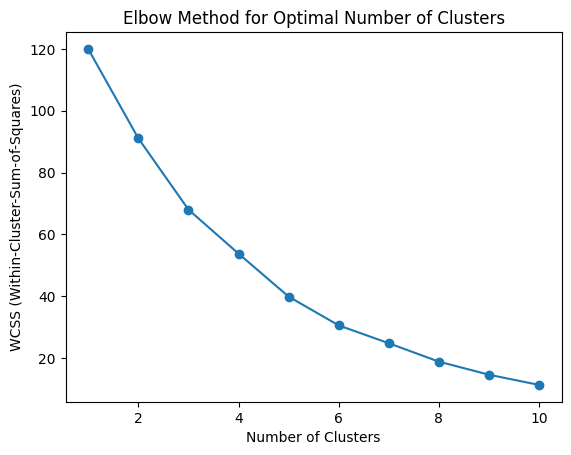

In [29]:
# scale  features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# determine ideal number of clusters with elbow method
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

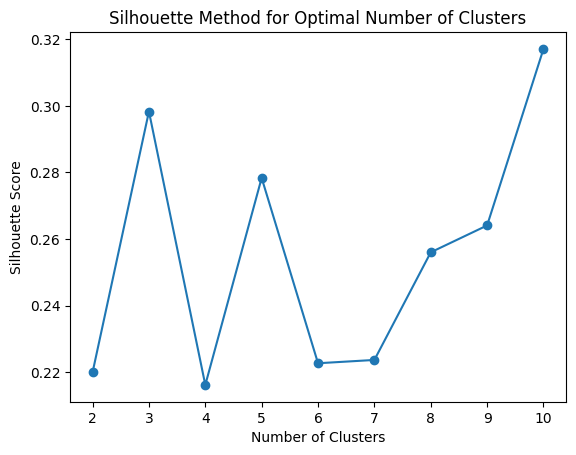

In [30]:
from sklearn.metrics import silhouette_score

# determine the ideal number of clusters using silhouette coefficient
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Visualize the results of the elbow method

In [31]:
# did above

## Use the recommended number of cluster (assuming it's different) to retrain your model and visualize the results

## Once again evaluate the quality of the clustering using total variance explained and silhouette scores

## Use the model to select countries for company to consider